<a href="https://colab.research.google.com/github/Gergerr/nlp/blob/main/02_CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # Classifier of Choice
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
# The goal of this dataset is to classify the documents

--2024-08-25 02:10:35--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  21.9MB/s    in 0.2s    

2024-08-25 02:10:36 (21.9 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [4]:
df= pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
inputs= df['text']
labels= df['labels']

Here we are plotting a histogram to check if there is an imbalanced classes. What is an imbalanced classes? That is when a classes is over, or under represented.

<Axes: >

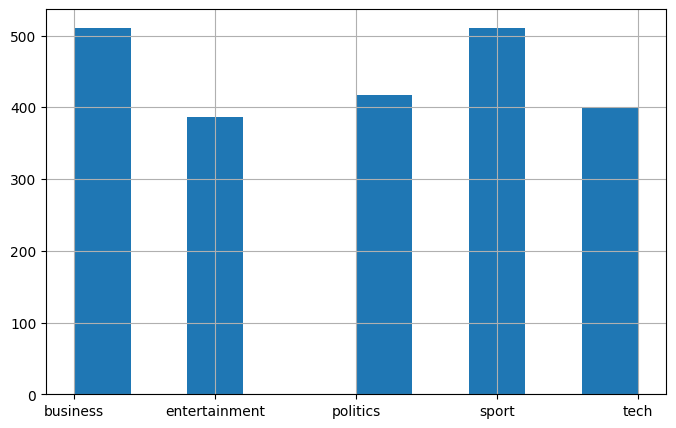

In [7]:
labels.hist(figsize= (8, 5))

In [18]:
inputs_train, inputs_test, Ytrain, Ytest= train_test_split(inputs, labels, random_state= 123)

In [19]:
vectorizer= CountVectorizer()

In [20]:
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)

Sometimes, we think why we call `fit_transform()` on one case, and only `transform()` in another. The reason is that training data is supposed to represent what we have when we build our model. The test data is supposed to represent what what we have when we apply our model to data we haven't seen before.

As such, we wouldn't want to fit the test data, because that is not how test data will be used.

In [21]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [22]:
(Xtrain != 0).sum()

337411

In [23]:
# What percentage of values are non zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [24]:
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score:  0.9712746858168761


In [26]:
# With stopwords
vectorizer= CountVectorizer(stop_words= 'english')
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score:  0.9766606822262118


In [27]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [29]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl= WordNetLemmatizer()

    def __call__(self, doc):
        tokens= word_tokenize(doc) # This is just a fancy method to string split.
        words_and_tags= nltk.pos_tag(tokens) # This to obtain the POS tags. Which returns a list containing tuples,
        # and each word in the documents, along with its corresponding tag.

        return [self.wnl.lemmatize(word, pos= get_wordnet_pos(tag)) \
                for word, tag in words_and_tags] # The output is list, containining its lemmatized words.

In [33]:
# with lemmatization
vectorizer= CountVectorizer(tokenizer= LemmaTokenizer())
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score:  0.9676840215439856


In [34]:
class StemTokenizer:
    def __init__(self):
        self.porter= PorterStemmer()

    def __call__(self, doc):
        tokens= word_tokenize(doc)
        return [self.porter.stem(word) for word in tokens]

In [35]:
# With stemming
vectorizer= CountVectorizer(tokenizer= StemTokenizer())
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score:  0.9694793536804309


In [36]:
def simple_tokenizer(s):
    return s.split()

In [37]:
# With stemming
vectorizer= CountVectorizer(tokenizer= simple_tokenizer)
Xtrain= vectorizer.fit_transform(inputs_train)
Xtest= vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9952038369304557
test score:  0.9712746858168761


1. What is the vector dimensionality in each case?
1. Compare them and consider why there are larger/smaller

Often, people assume that most complex method will perform best, in this case lemmatization.
However, once we tried it, it resulted in the worst performance of all.